In [33]:
#Libaries for arrays and plotting:
import numpy as np
import matplotlib.pyplot as plt

#My own files:
import single_neuron_int_and_fire as sn 
import two_neuron_int_and_fire as tn 
import hodgkin_huxley as hh 

**EXERCISE 1**

Simulate an integrate and fire model with the following parameters (notation as in the slides) for 1s:

- τm= 10 (ms) (i.e. τmis the time constant of the membrane)
- EL = Vreset = -70 (mV)
- Vth = -40 (mV)
- Rm = 10 (MΩ)
- Ie = 3.1 (nA)
- DT = 1 (ms)

And plot the voltage as a function of time. For simplicity assume that the neuron does not have a refractory period after producing a spike. You do not need to plot spikes - once membrane potential exceeds threshold, simply set the membrane potential to Vreset.

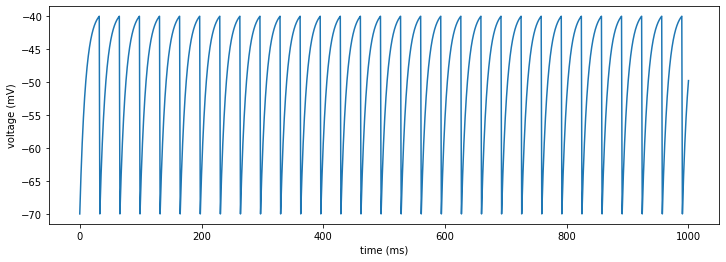

In [34]:
#Set the hyperparameters:
Tau_m= 10       
E_l=-70 
V_reset = -70 
V_th = -40 
R_m = 10  
I_e = 3.1 
Dt = 1  
N_steps=1000 #Number of simulated time steps.
V_0=E_l

#Simulate:
time_vec,v_vec,_=sn.sim_int_and_fire(V_0,N_steps,V_th,V_reset,E_l,R_m,I_e,Tau_m,Dt)

#Plot:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,4))
ax.plot(time_vec,v_vec)
ax.set_xlabel("time (ms)")
ax.set_ylabel("voltage (mV)")

plt.savefig("plots/simulate_single_neuron.jpg")

**EXERCISE 2**

Compute analytically the minimum current Ie required for the neuron with the above parameters (τm,EL, Vreset, Vth, Rm) to produce an action potential.

In [35]:
min_current=sn.min_current_to_prod_action_potential(E_l,V_th,R_m)
print("The minimum current for spikes is: ", min_current)

The minimum current for spikes is:  3.0


**EXERCISE 3**

Simulate the neuron (for 1s) for the input current with amplitude Ie which is 0.1 (nA) lower than the minimum current computed in part a), and plot the voltage as a functions of time.

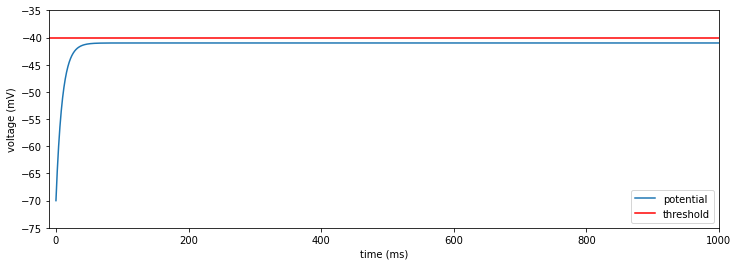

In [36]:
I_e_low=min_current-0.1
time_vec,v_vec,_=sn.sim_int_and_fire(V_0,N_steps,V_th,V_reset,E_l,R_m,I_e_low,Tau_m,Dt)

#Plot:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,4))
ax.plot(time_vec,v_vec,label='potential')

ax.axhline(y=V_th, color='r', linestyle='-',label='threshold')

ax.set_xlabel("time (ms)")
ax.set_ylabel("voltage (mV)")
ax.set_xlim(-10,N_steps*Dt)
ax.set_ylim(V_reset-5,V_th+5)
ax.legend()

plt.savefig("plots/simulate_single_neuron_low_current.png")

**EXERCISE 4**

Simulate the neuron (for 1s) for currents ranging from 2 (nA) to 5 (nA) in steps of 0.1 (nA). For each amplitude of current count the number of spikes produced (i.e. the firing rate). Plot the firing rate as the function of the input current

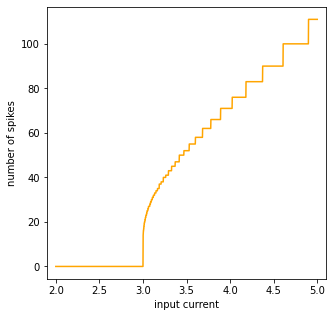

In [37]:

I_e_vec=np.arange(2,5,0.001) #I choose a higher resolution than asked.
n_act_pot_list=[]

#Go over all potentials:
for I_e_st in I_e_vec:
    _,_,n_act_pot=sn.sim_int_and_fire(V_0,N_steps,V_th,V_reset,E_l,R_m,I_e_st,Tau_m,Dt)
    n_act_pot_list.append(n_act_pot)

#Plot:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.plot(I_e_vec,n_act_pot_list,label='number of spikes',color='orange')


ax.set_xlabel("input current")
ax.set_ylabel("number of spikes")
ax.set_xlim(1.9,5.1)

plt.savefig("plots/current_vs_n_action_potentials.png")



**Exercise 5**

Simulate two neurons which have synaptic connections between each other, i.e. the first neuron projects to the second, and the second neuron projects to the first. Both model neurons should have the same parameters:

- τm= 20 (ms)
- EL= -70 (mV)
- Vreset = -80 (mV)
- Vth = -54 (mV)
- Rm x Ie = 18 (mV)

and their synapses should also have the same parameters:

- Rm x Gs = 0.15
- Pmax = 0.5
- τs = 10 (ms)

Simulate two cases: a) assuming that the synapses are excitatory with Es = 0 (mV), and b) assuming that the synapses are inhibitory with Es = -80 (mV). For each simulation set the initial membrane potentials of the neurons V to different values chosen randomly from between Vreset and Vth and simulate 1s of activity. For each case plot the voltages of the two neurons on the same graph (with different colours). You should observe differences between the two cases. Comment these differences, and why they occur.

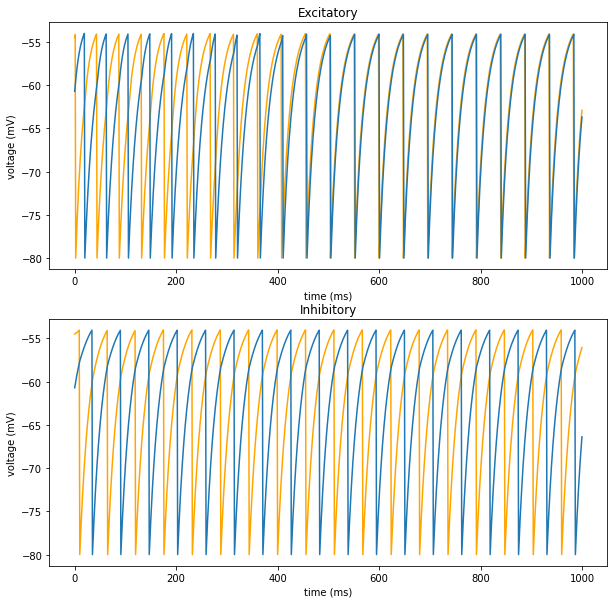

In [38]:
#Minimum resting membrane potential

Tau_m= 20       
E_l=-70 
V_reset = -80 
V_th = -54 
R_m = 6  
I_e = 18/R_m 
Dt = 1  
N_steps=1000 #Number of simulated time steps.
V_0=E_l
G_s = 0.15/R_m
P_max = 0.5
Tau_s = 10
N_steps=1000

#Starting voltage:
V1_0=np.random.uniform(low=V_reset,high=V_th)
V2_0=np.random.uniform(low=V_reset,high=V_th)

#Synapse potentials:
E_s_excit=0
E_s_inhib=-80


time_list,v1_list,v2_list,_,_=tn.sim_two_neuron_int_and_fire(N_steps,Dt,V1_0,V2_0,P_max,Tau_s,E_l,R_m,G_s,E_s_excit,I_e,Tau_m,V_reset,V_th)

#Plot:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].plot(time_list,v1_list,color='orange')
ax[0].plot(time_list,v2_list)
ax[0].set_xlabel("time (ms)")
ax[0].set_ylabel("voltage (mV)")
ax[0].set_title("Excitatory")

time_list,v1_list,v2_list,_,_=tn.sim_two_neuron_int_and_fire(N_steps,Dt,V1_0,V2_0,P_max,Tau_s,E_l,R_m,G_s,E_s_inhib,I_e,Tau_m,V_reset,V_th)

ax[1].plot(time_list,v1_list,color='orange')
ax[1].plot(time_list,v2_list)
ax[1].set_xlabel("time (ms)")
ax[1].set_ylabel("voltage (mV)")
ax[1].set_title("Inhibitory")

plt.savefig("plots/two_neuron_simulation.png")




**Optional Exercise: Simulation of the Hodgkin-Huxley model**

In the following, we simulate the Hodgkin-Huxley model for the membrane potential of a single neuron in scenarios:

1. We inject a constant current.

2. We inject a time variable current and observe the changes in membrane potential.

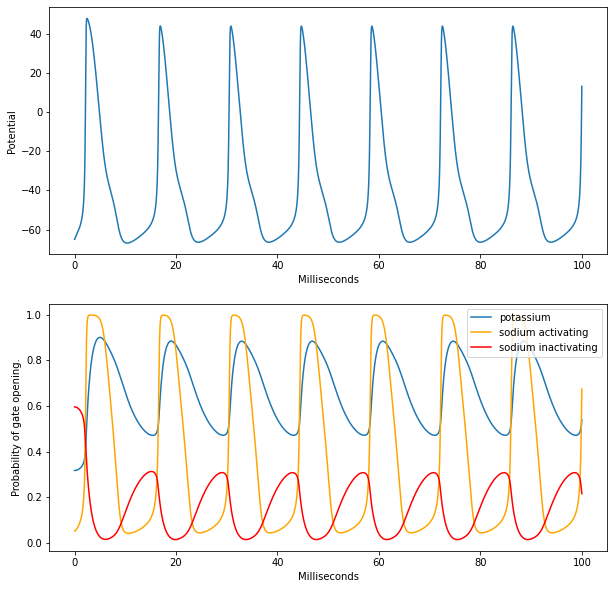

In [40]:
#Libaries for arrays and plotting:
import numpy as np
import matplotlib.pyplot as plt

#My own files:
import single_neuron_int_and_fire as sn 
import two_neuron_int_and_fire as tn 
import hodgkin_huxley as hh 

#Set hyperparameters:
N_steps=100000 #Simulate 100ms
Dt=0.001


V_0=-65

alpha_n,beta_n=hh.compute_alpha_beta_n(V_0)
alpha_m,beta_m=hh.compute_alpha_beta_m(V_0)
alpha_h,beta_h=hh.compute_alpha_beta_h(V_0)

#Initialize with equilibrium:
N_0=0.3177 #alpha_n/(alpha_n+beta_n)
M_0=0.0529 #alpha_m/(alpha_m+beta_m)
H_0=0.5961 #alpha_h/(alpha_h+beta_h)

C_m=0.01

G_k_const=0.036
G_na_const=1.20
G_l_const=0.003

V_na=50
V_k=-77
V_l=-54.4

#1.Constant current:
I_ind=0.02


t_list,v_t_list,n_t_list,m_t_list,h_t_list,i_t_list=hh.sim_hodgkin_huxley(N_steps,Dt,V_0,N_0,M_0,H_0,I_ind,C_m,G_k_const,G_na_const,G_l_const,V_na,V_k,V_l)

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
ax[0].plot(t_list,v_t_list)
ax[0].set_xlabel("Milliseconds")
ax[0].set_ylabel("Potential")

ax[1].plot(t_list,n_t_list,label='potassium')
ax[1].plot(t_list,m_t_list,color='orange',label='sodium activating')
ax[1].plot(t_list,h_t_list,color='red',label='sodium inactivating')
ax[1].set_xlabel("Milliseconds")
ax[1].set_ylabel("Probability of gate opening.")
ax[1].legend()

plt.savefig("plots/hh_single_neuron_constant_current.png")


